# Heat equation
### PDE problem
Our model problem for time-dependent PDEs reads
$$ \frac {\partial u} { \partial t} = \nabla^2 u + f, \quad \mbox{ in} \ \Omega \times (0, T]$$

$$ u = u_{D} \quad \mbox{on} \  \partial \Omega \times (0, T]$$
$$ u = u_{0} \quad \mbox{at} \  t = 0$$

where $u_{D}(x,y,t)=1+x^2+\alpha y^2+ \beta t$, $u_{0}(x,y)=1+x^2+\alpha y^2$, and $f(x,y,t)=\beta−2−2\alpha$. This equation will need to be written in its weak form using finite element method before solving.
 

## Weak formulation

## Fenics Installation
* Install FEniCS and Jupyter from conda-forge channel:
"conda create -n fenicsproject -c conda-forge python=3.5 jupyter fenics"
* Activated fenicsproject:
"source activate fenicsproject"
* Start a Jupyter notebook from terminal:
"jupyter-notebook" 
* Install other libraries:
"conda install -n fenicsproject matplotlib"

In [21]:
from fenics import *
import numpy as np

In [2]:
T = 2.0            # final time
num_steps = 10     # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta

In [3]:
# Create mesh and define function space
nx = ny = 8
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [4]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
                 degree=2, alpha=alpha, beta=beta, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [5]:
# Define initial value
u_n = interpolate(u_D, V)

In [6]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

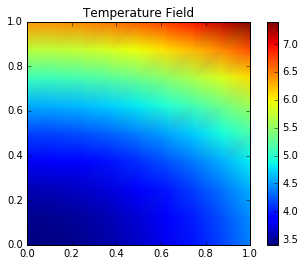

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)

    
    # Compute error at vertices
    u_e = interpolate(u_D, V)
    #error = np.abs(u_e.vector().array() - u.vector().array()).max()
    #print('t = %.2f: error = %.3g' % (t, error))

    # Update previous solution
    u_n.assign(u)

# Plot solution
fig = plt.figure()
c=plot(u, mode='color')
plt.colorbar(c)
plt.title("Temperature Field")
plt.show()

The temperature increases along both axis as expected